# Namazbayev Almas 180107192

Import the libraries

In [2]:
import scipy.io as s
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read the data

In [3]:
data = s.loadmat("data.mat")
a = np.array(data['X'])
Xval = data["Xval"]
print(Xval)

[[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]
 [12.94888838 16.14006828]
 [15.31084155 15.17480137]
 [13.89795241 15.43169469]
 [11.92096525 14.30579937]
 [14.85934119 14.90066474]
 [13.63501268 14.5620583 ]
 [15.75981741 15.13340409]
 [15.221965   14.18491044]
 [12.10564111 13.42653822]
 [14.80848889 13.87075725]
 [15.36135887 15.99014917]
 [12.72914442 15.8265107 ]
 [15.38533789 15.21036416]
 [13.81810534 14.29933915]
 [15.3788488  15.90228514]
 [14.11232153 15.31616729]
 [12.82415241 13.6971992 ]
 [14.58354683 14.99675181]
 [14.2948367  15.84651796]
 [13.5112881  15.5909427 ]
 [13.71433284 15.35484382]
 [12.85788467 14.00239134]
 [14.56998008 14.22432035]
 [15.59049569 15.72143533]
 [13.0999943  15.0900635 ]
 [14.61461465 14.85494525]
 [13.92751557 16.09420913]
 [13.28968651 15.42177935]
 [14.3283751  15.01104801]
 [12.99369072 15.02922303]
 [13.21733162 15.02076411]
 [13.72874052 14.03641262]
 

Plot the data

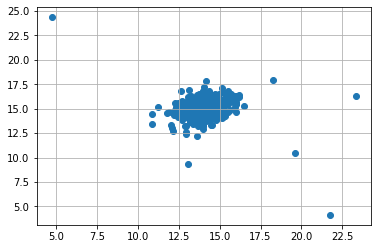

In [8]:
def showplt():
    plt.scatter(a[:,0],a[:,1])
    plt.grid(True)
    plt.show()
showplt()

Find outliers and color them in red. You need to choose your own epsilon

In [5]:
def anomalyList(epsilon):
    anomaly = []
    a, b = Xval[:, 0], Xval[:, 1]
    mean1, mean2 = sum(a)/len(a), sum(b)/len(b)
    
    std1, std2 = 0, 0
    for i in a: std1 += ((i - mean1)**2)/len(a)
    for i in b: std2 += ((i - mean2)**2)/len(b)  
        
    for i,j in zip(a,b):
        p1 = (1 / ((2*np.pi)**0.5)*std1) * (np.exp((-(i-mean1)**2)/2*std1))
        p2 = (1 / ((2*np.pi)**0.5)*std2) * (np.exp((-(j-mean2)**2)/2*std2))
        
        if p1*p2 >= epsilon:
            anomaly.append('b')
        else:
            anomaly.append('r')
            
    return anomaly

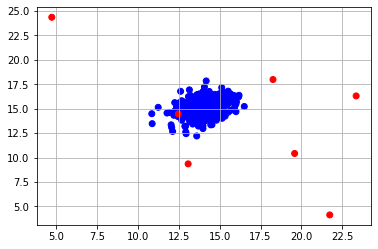

In [6]:
dx, dy = Xval.T
plt.grid()
plt.scatter(a[:,0], a[:,1], color=anomalyList(0.0000000001))